In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
df = pd.read_csv(r"C:\Users\RT\OneDrive\Documents\Datasets\Human Resources.csv")

In [11]:
# Data Summary
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Data Shape: (13465, 15)

Data Types:
 employee_id           object
first_name            object
last_name             object
gender                object
state                 object
city                  object
hiredate              object
department            object
job_title             object
education_level       object
salary                 int64
performance_rating    object
overtime              object
birthdate             object
termdate              object
dtype: object

First 5 Rows:
    employee_id first_name last_name  gender     state           city  \
0  00-95822412   Danielle   Johnson  Female  New York  New York City   
1  00-42868828       John    Taylor    Male  New York  New York City   
2  00-83197857      Erica   Mcclain    Male  Michigan         Warren   
3  00-13999315   Brittany   Johnson    Male  New York  New York City   
4  00-90801586    Jeffery    Wagner    Male  New York  New York City   

    hiredate        department              job_title education_

In [76]:
# Convert 'birthdate', 'hiredate', and 'termdate' to datetime format
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')
df['hiredate'] = pd.to_datetime(df['hiredate'], errors='coerce')
df['termdate'] = pd.to_datetime(df['termdate'], errors='coerce')

In [19]:
print(df.dtypes)

print(df.info())

employee_id                   object
first_name                    object
last_name                     object
gender                        object
state                         object
city                          object
hiredate              datetime64[ns]
department                    object
job_title                     object
education_level               object
salary                         int64
performance_rating            object
overtime                      object
birthdate             datetime64[ns]
termdate              datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13465 entries, 0 to 13464
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   employee_id         13465 non-null  object        
 1   first_name          13465 non-null  object        
 2   last_name           13465 non-null  object        
 3   gender              13465 non-null  o

In [21]:
# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 employee_id               0
first_name                0
last_name                 0
gender                    0
state                     0
city                      0
hiredate                  0
department                0
job_title                 0
education_level           0
salary                    0
performance_rating        0
overtime                  0
birthdate                 0
termdate              11964
dtype: int64


In [23]:
# Check for Duplicate Rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [25]:
# Unique Values in Categorical Columns
categorical_cols = ['department', 'job_title', 'state', 'city', 'gender', 'education_level']
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in department: 7
Unique values in job_title: 28
Unique values in state: 8
Unique values in city: 24
Unique values in gender: 2
Unique values in education_level: 4


In [44]:
# Convert 'birthdate' to datetime, coercing any invalid values to NaT
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')


In [46]:
print(df['birthdate'].dtypes)
# Alternatively, use df.info() to check all columns
print(df.info())


datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13465 entries, 0 to 13464
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   employee_id         13465 non-null  object        
 1   first_name          13465 non-null  object        
 2   last_name           13465 non-null  object        
 3   gender              13465 non-null  object        
 4   state               13465 non-null  object        
 5   city                13465 non-null  object        
 6   hiredate            13465 non-null  object        
 7   department          13465 non-null  object        
 8   job_title           13465 non-null  object        
 9   education_level     13465 non-null  object        
 10  salary              13465 non-null  int64         
 11  performance_rating  13465 non-null  object        
 12  overtime            13465 non-null  object        
 13  birthdate           13465 non-n

In [35]:
# Visualization settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### ANALYSIS WITH CHARTS ###

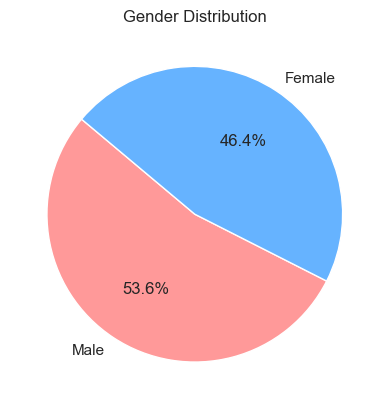

In [38]:
# 1. Gender Distribution
plt.figure()
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

In [52]:
# Calculate age by subtracting birth year from the current year
current_year = datetime.now().year
df['age'] = current_year - df['birthdate'].dt.year


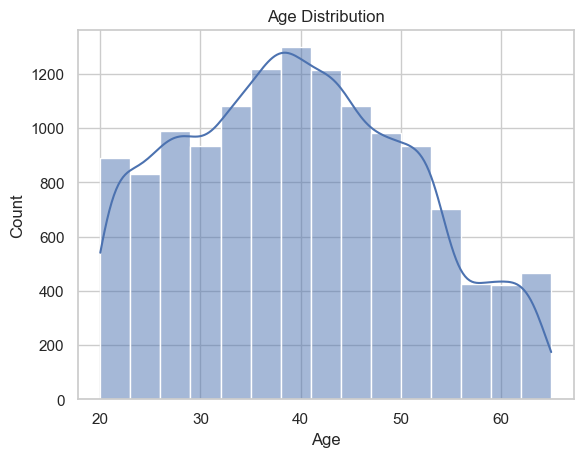

In [54]:
# Age Distribution
plt.figure()
sns.histplot(df['age'].dropna(), bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

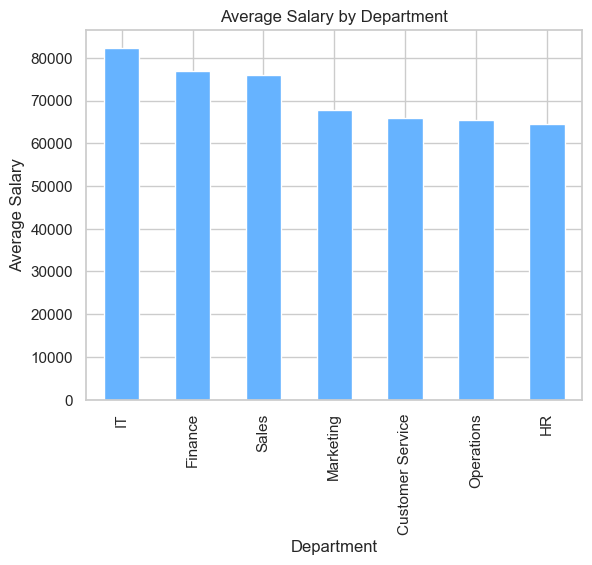

In [60]:
#  Average Salary by Department
# Calculate and sort the average salary by department in descending order
avg_salary_by_department = df.groupby('department')['salary'].mean().sort_values(ascending=False)

# Plot the sorted data
plt.figure()
avg_salary_by_department.plot(kind='bar', color='#66b3ff')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


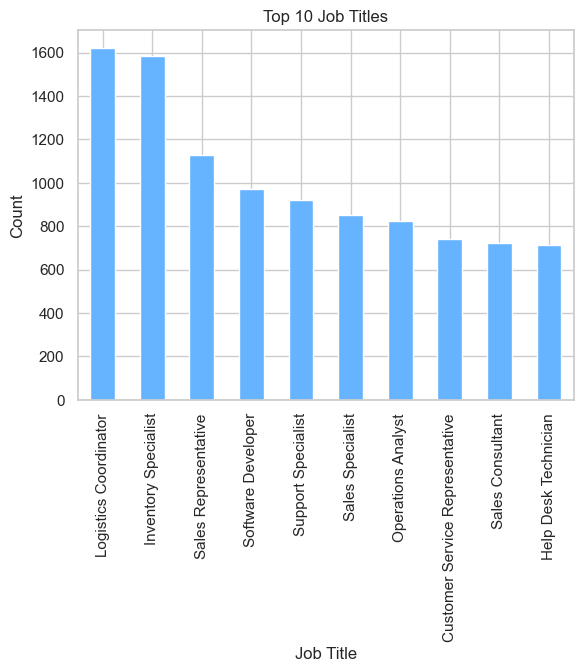

In [64]:
# 4. Job Title Popularity
plt.figure()
df['job_title'].value_counts().head(10).plot(kind='bar', color='#66b3ff')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

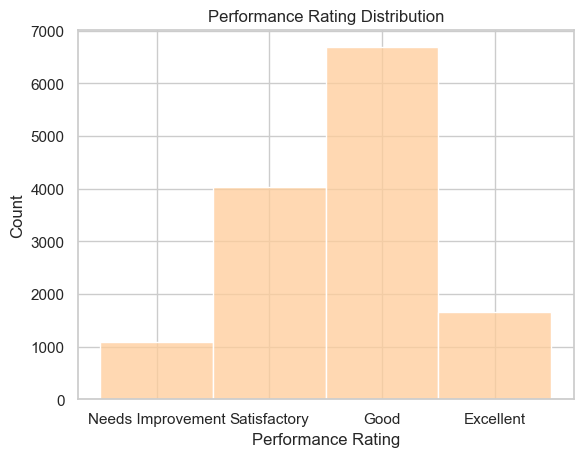

In [66]:
# 5. Performance Rating Distribution
plt.figure()
sns.histplot(df['performance_rating'], bins=5, kde=False, color='#ffcc99')
plt.title("Performance Rating Distribution")
plt.xlabel("Performance Rating")
plt.show()

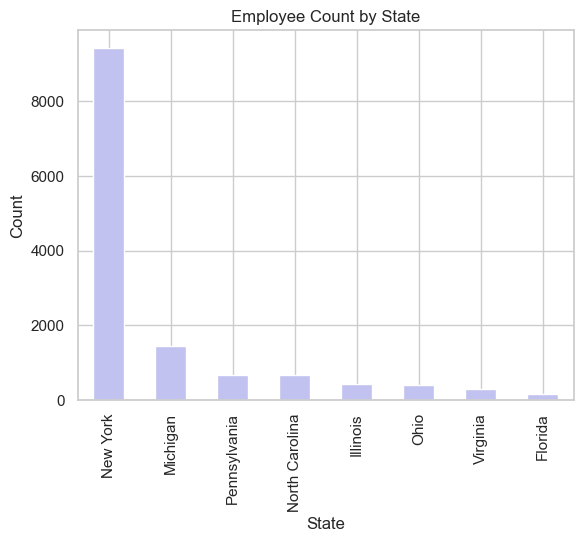

In [70]:
# 7. Employee Count by State
plt.figure()
df['state'].value_counts().plot(kind='bar', color='#c2c2f0')
plt.title("Employee Count by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

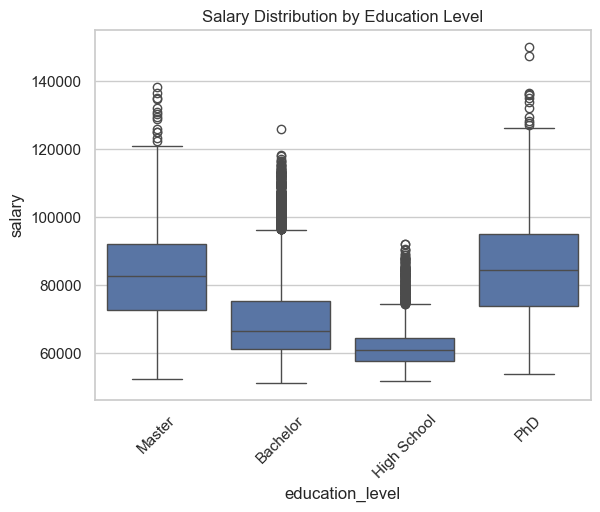

In [72]:
# 8. Salary Distribution by Education Level
plt.figure()
sns.boxplot(x='education_level', y='salary', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Education Level")
plt.show()

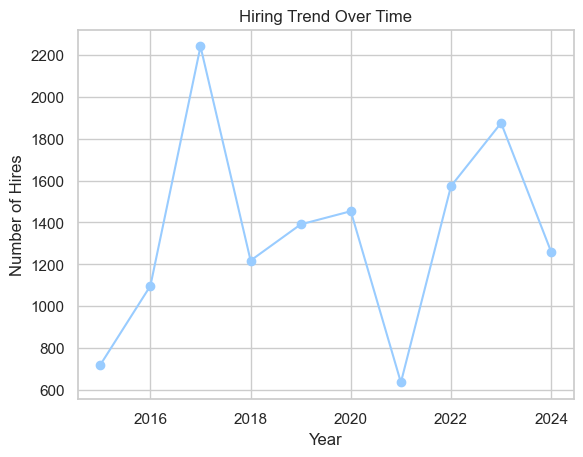

In [78]:
# 9. Hiring Trend Over Time
plt.figure()
df['hire_year'] = df['hiredate'].dt.year
df['hire_year'].value_counts().sort_index().plot(kind='line', marker='o', color='#99ccff')
plt.title("Hiring Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Hires")
plt.show()

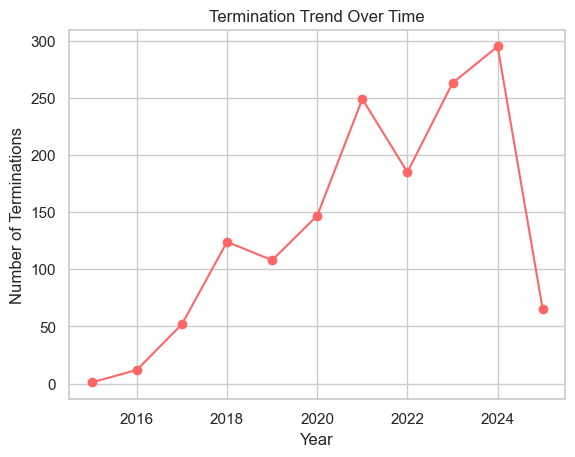

In [80]:
# 10. Termination Trend Over Time
plt.figure()
df['term_year'] = df['termdate'].dt.year.dropna()
df['term_year'].value_counts().sort_index().plot(kind='line', marker='o', color='#ff6666')
plt.title("Termination Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Terminations")
plt.show()

### ANALYSIS WITHOUT CHARTS ###

In [83]:
# 11. Average Salary by Job Title
avg_salary_by_title = df.groupby('job_title')['salary'].mean()
print("\nAverage Salary by Job Title:\n", avg_salary_by_title)


Average Salary by Job Title:
 job_title
Accountant                          73483.595918
Accounts Payable Specialist         62364.945946
Content Creator                     61533.561364
Customer Service Manager            85922.898305
Customer Service Representative     61350.748649
Finance Manager                    122341.588235
Financial Analyst                   85339.517510
HR Assistant                        61388.410714
HR Coordinator                      63222.080460
HR Manager                          75306.750000
Help Desk Technician                72561.412342
IT Manager                         116005.275000
IT Support Specialist               61547.382075
Inventory Specialist                61599.683512
Logistics Coordinator               63212.869378
Marketing Coordinator               68477.788344
Marketing Manager                   95780.177778
Operations Analyst                  73900.216019
Operations Manager                  96990.743902
Recruiter                   

In [87]:
# 13. Top 5 Cities by Employee Count
top_cities = df['city'].value_counts().head(5)
print("\nTop 5 Cities by Employee Count:\n", top_cities)


Top 5 Cities by Employee Count:
 city
Rochester        3168
New York City    3157
Buffalo          3113
Detroit           526
Warren            458
Name: count, dtype: int64


In [89]:
# 14. Gender Pay Gap
avg_salary_by_gender = df.groupby('gender')['salary'].mean()
print("\nAverage Salary by Gender:\n", avg_salary_by_gender)


Average Salary by Gender:
 gender
Female    69112.008170
Male      72649.560986
Name: salary, dtype: float64


In [101]:


# Fill NaT in termdate with the current date and assign back to the column
df['termdate'] = df['termdate'].fillna(pd.Timestamp('now'))

# Calculate tenure as the difference between termdate and hiredate
df['tenure'] = (df['termdate'] - df['hiredate']).dt.days / 365.25

# Print the resulting DataFrame to verify
print(df[['employee_id', 'first_name', 'hiredate', 'termdate', 'tenure']])


       employee_id first_name   hiredate                   termdate    tenure
0      00-95822412   Danielle 2016-04-16 2016-10-13 00:00:00.000000  0.492813
1      00-42868828       John 2017-02-09 2021-01-27 00:00:00.000000  3.964408
2      00-83197857      Erica 2016-02-03 2021-12-22 00:00:00.000000  5.883641
3      00-13999315   Brittany 2016-02-06 2018-07-19 00:00:00.000000  2.447639
4      00-90801586    Jeffery 2015-01-11 2018-09-13 00:00:00.000000  3.671458
...            ...        ...        ...                        ...       ...
13460  00-79400797    Natalie 2018-03-09 2024-11-13 16:16:48.775660  6.683094
13461  00-85589440        Jon 2020-05-05 2024-11-13 16:16:48.775660  4.525667
13462  00-44355066      Jason 2023-08-29 2024-11-13 16:16:48.775660  1.210130
13463  00-93446015    Allison 2019-10-24 2024-11-13 16:16:48.775660  5.056810
13464  00-62574229     Deanna 2020-05-19 2024-11-13 16:16:48.775660  4.487337

[13465 rows x 5 columns]


In [103]:
# 16. Longest-serving Employees
longest_serving = df.sort_values(by='tenure', ascending=False)[['employee_id', 'first_name', 'last_name', 'tenure']].head(5)
print("\nTop 5 Longest-serving Employees:\n", longest_serving)


Top 5 Longest-serving Employees:
        employee_id first_name last_name    tenure
12079  00-99325851      Nancy    Miller  9.867214
10050  00-66665722       Fred   Herrera  9.867214
5158   00-15142659       Alex      Hill  9.867214
9046   00-53117431      Jacob  Jacobson  9.867214
2268   00-28134687   Courtney   Padilla  9.867214


In [111]:

# Salary Growth Over Tenure
# Ensure 'tenure' column is numeric and valid
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Create bins for tenure
tenure_bins = pd.cut(df['tenure'], bins=5)

# Calculate average salary growth over tenure
salary_growth = df.groupby(tenure_bins)['salary'].mean()
print("\nSalary Growth Over Tenure:\n", salary_growth)



Salary Growth Over Tenure:
 tenure
(-0.139, 1.87]    70960.068729
(1.87, 3.87]      70899.405553
(3.87, 5.869]     71026.457427
(5.869, 7.868]    71176.816561
(7.868, 9.867]    70923.417279
Name: salary, dtype: float64


C:\Users\RT\AppData\Local\Temp\ipykernel_21580\1448953727.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_growth = df.groupby(tenure_bins)['salary'].mean()


In [113]:
# 20. Median Salary by City
median_salary_by_city = df.groupby('city')['salary'].median()
print("\nMedian Salary by City:\n", median_salary_by_city)


Median Salary by City:
 city
Allentown         66556.0
Aurora            67431.0
Buffalo           66538.0
Charlotte         66251.0
Chicago           64891.0
Cincinnati        67187.5
Cleveland         65223.5
Columbus          66953.0
Detroit           66842.5
Grand Rapids      66789.0
Greensboro        68109.0
Miami             69532.0
Naperville        66618.0
New York City     67234.0
Norfolk           66576.0
Orlando           66283.5
Philadelphia      65552.0
Pittsburgh        67179.5
Raleigh           67900.0
Richmond          69844.0
Rochester         66717.5
Tampa             64391.0
Virginia Beach    66198.0
Warren            66294.5
Name: salary, dtype: float64
